In [13]:
import pandas as pd
import matplotlib.pyplot as plt

### Paper: http://docentes.fe.unl.pt/~psc/MomentumMoments.pdf

# Data from Kenneth R. French Data Library
http://mba.tuck.dartmouth.edu/pages/faculty/ken.french/data_library.html

## Detail for 10 Portfolios Formed Monthly on Momentum

**Monthly Returns:** January 1927 - May 2017

**Construction**: The portfolios are constructed monthly using NYSE prior (2-12) return decile breakpoints.
 	 	 
**Stocks:**	The portfolios constructed each month include NYSE, AMEX, and NASDAQ stocks with prior return data. To be included in a portfolio for month t (formed at the end of month t-1), a stock must have a price for the end of month t-13 and a good return for t-2. In addition, any missing returns from t-12 to t-3 must be -99.0, CRSP's code for a missing price. Each included stock also must have ME for the end of month t-1.

In [14]:
momentum_returns_df = pd.read_csv('/Users/anuraaggopaluni/bualpha/research-papers/notebooks/momentum-moments/Momentum new.csv')

In [15]:
momentum_returns_df.head()

,Unnamed: 0,Lo PRIOR,PRIOR 2,PRIOR 3,PRIOR 4,PRIOR 5,PRIOR 6,PRIOR 7,PRIOR 8,PRIOR 9,Hi PRIOR
0,192701,-3.32,-4.62,2.66,-0.32,-0.41,0.96,0.77,0.36,-0.43,-0.24
1,192702,7.49,6.01,8.33,7.51,3.80,4.16,2.81,3.28,4.21,6.96
2,192703,-3.20,-2.99,-3.98,-4.76,-0.48,-2.40,2.10,0.61,0.89,5.47
3,192704,1.53,-2.87,-2.46,-1.34,2.59,-0.13,2.05,-0.59,1.64,5.49
4,192705,3.98,4.39,5.90,3.15,6.25,5.92,4.66,6.59,8.16,6.24


In [16]:
momentum_returns_df.shape

(1085, 11)

In [17]:
momentum_returns_df.columns=['month','1','2','3','4','5','6','7','8','9','10']
momentum_returns_df.head()

,month,1,2,3,4,5,6,7,8,9,10
0,192701,-3.32,-4.62,2.66,-0.32,-0.41,0.96,0.77,0.36,-0.43,-0.24
1,192702,7.49,6.01,8.33,7.51,3.80,4.16,2.81,3.28,4.21,6.96
2,192703,-3.20,-2.99,-3.98,-4.76,-0.48,-2.40,2.10,0.61,0.89,5.47
3,192704,1.53,-2.87,-2.46,-1.34,2.59,-0.13,2.05,-0.59,1.64,5.49
4,192705,3.98,4.39,5.90,3.15,6.25,5.92,4.66,6.59,8.16,6.24


In [18]:
momentum_returns_df = momentum_returns_df.set_index('month')
momentum_returns_df.head()

,1,2,3,4,5,6,7,8,9,10
month,,,,,,,,,,
192701,-3.32,-4.62,2.66,-0.32,-0.41,0.96,0.77,0.36,-0.43,-0.24
192702,7.49,6.01,8.33,7.51,3.80,4.16,2.81,3.28,4.21,6.96
192703,-3.20,-2.99,-3.98,-4.76,-0.48,-2.40,2.10,0.61,0.89,5.47
192704,1.53,-2.87,-2.46,-1.34,2.59,-0.13,2.05,-0.59,1.64,5.49
192705,3.98,4.39,5.90,3.15,6.25,5.92,4.66,6.59,8.16,6.24


In [19]:
momentum_returns_df.index.name = None
momentum_returns_df.head()

,1,2,3,4,5,6,7,8,9,10
192701,-3.32,-4.62,2.66,-0.32,-0.41,0.96,0.77,0.36,-0.43,-0.24
192702,7.49,6.01,8.33,7.51,3.80,4.16,2.81,3.28,4.21,6.96
192703,-3.20,-2.99,-3.98,-4.76,-0.48,-2.40,2.10,0.61,0.89,5.47
192704,1.53,-2.87,-2.46,-1.34,2.59,-0.13,2.05,-0.59,1.64,5.49
192705,3.98,4.39,5.90,3.15,6.25,5.92,4.66,6.59,8.16,6.24


### Each month, I take the highest decile of returns minus the lowest decile of returns

In [20]:
momentum_returns_df['high_minus_low'] = momentum_returns_df.max(axis=1) - momentum_returns_df.min(axis=1)

In [21]:
momentum_returns_df.head()

,1,2,3,4,5,6,7,8,9,10,high_minus_low
192701,-3.32,-4.62,2.66,-0.32,-0.41,0.96,0.77,0.36,-0.43,-0.24,7.28
192702,7.49,6.01,8.33,7.51,3.80,4.16,2.81,3.28,4.21,6.96,5.52
192703,-3.20,-2.99,-3.98,-4.76,-0.48,-2.40,2.10,0.61,0.89,5.47,10.23
192704,1.53,-2.87,-2.46,-1.34,2.59,-0.13,2.05,-0.59,1.64,5.49,8.36
192705,3.98,4.39,5.90,3.15,6.25,5.92,4.66,6.59,8.16,6.24,5.01


In [22]:
momentum_returns_df=momentum_returns_df.rename(
    columns = {
        'high_minus_low':'WML_returns'
    }
)

In [23]:
momentum_returns_df.head()

,1,2,3,4,5,6,7,8,9,10,WML_returns
192701,-3.32,-4.62,2.66,-0.32,-0.41,0.96,0.77,0.36,-0.43,-0.24,7.28
192702,7.49,6.01,8.33,7.51,3.80,4.16,2.81,3.28,4.21,6.96,5.52
192703,-3.20,-2.99,-3.98,-4.76,-0.48,-2.40,2.10,0.61,0.89,5.47,10.23
192704,1.53,-2.87,-2.46,-1.34,2.59,-0.13,2.05,-0.59,1.64,5.49,8.36
192705,3.98,4.39,5.90,3.15,6.25,5.92,4.66,6.59,8.16,6.24,5.01


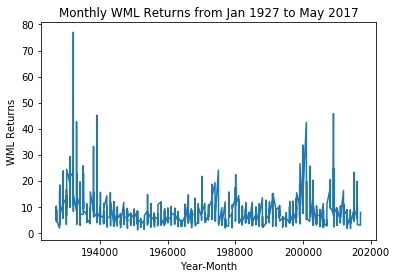

In [24]:
plt.plot(momentum_returns_df['WML_returns'])
plt.xlabel('Year-Month')
plt.ylabel('WML Returns')
plt.title('Monthly WML Returns from Jan 1927 to May 2017');
plt.show()

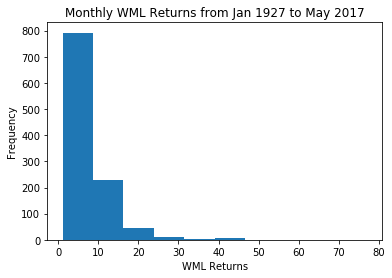

In [25]:
plt.hist(momentum_returns_df['WML_returns'])
plt.xlabel('WML Returns')
plt.ylabel('Frequency')
plt.title('Monthly WML Returns from Jan 1927 to May 2017');
plt.show()

In [26]:
momentum_returns_df['WML_returns'].describe()

count    1085.000000
mean        7.651152
std         5.886184
min         1.070000
25%         4.250000
50%         6.200000
75%         9.000000
max        77.020000
Name: WML_returns, dtype: float64

In [28]:
print('Kurtosis: ' + str(momentum_returns_df['WML_returns'].kurtosis()))
print('Skewness: '+ str(momentum_returns_df['WML_returns'].skew()))


Kurtosis: 32.3861147105
Skewness: 4.22810375746


As talked about at length in the paper, kurtosis and skewness are measures that should be kept as low as possible, and this is what the risk-managed momentum strategy seeks. At the end of this implementation, we will see if this is the case.

### Now I import daily returns in order to calculate realized variances or standard deviations with a 6-month lookback. We are now implementing the risk-managed momentum strategy.

In [42]:
daily_returns_df = pd.read_csv('/Users/anuraaggopaluni/bualpha/research-papers/notebooks/momentum-moments/Daily Returns.csv')

**Daily Returns:** November 3, 1926 - May 31, 2017
 	 	 
**Construction:** The portfolios are constructed daily using NYSE prior (2-12) return decile breakpoints.
 	 	 
**Stocks:** The portfolios constructed each day include NYSE, AMEX, and NASDAQ stocks with prior return data. To be included in a portfolio for day t, a stock must have a price for the day t-251 and a good return for t-21. In addition, any missing returns from day t-250 to t-22 must be -99.0, CRSP's code for a missing price. Each included stock also must have ME for the end of day t-1.
 

In [43]:
daily_returns_df.head()

,Unnamed: 0,Lo PRIOR,PRIOR 2,PRIOR 3,PRIOR 4,PRIOR 5,PRIOR 6,PRIOR 7,PRIOR 8,PRIOR 9,Hi PRIOR
0,19261103,-0.12,0.58,-0.09,0.30,-0.49,-0.23,-0.12,0.42,0.12,1.28
1,19261104,0.65,1.38,1.58,0.57,1.01,0.70,0.81,0.44,0.47,0.40
2,19261105,-0.84,-0.75,-0.20,-0.15,-0.03,0.11,-0.13,0.36,0.20,0.08
3,19261106,1.03,0.29,0.26,0.37,0.18,0.64,0.10,0.09,0.40,-0.68
4,19261108,-0.03,0.07,1.80,0.28,0.31,0.25,0.30,1.17,0.58,-0.18


In [44]:
daily_returns_df.columns=['month','1','2','3','4','5','6','7','8','9','10']
daily_returns_df.head()

,month,1,2,3,4,5,6,7,8,9,10
0,19261103,-0.12,0.58,-0.09,0.30,-0.49,-0.23,-0.12,0.42,0.12,1.28
1,19261104,0.65,1.38,1.58,0.57,1.01,0.70,0.81,0.44,0.47,0.40
2,19261105,-0.84,-0.75,-0.20,-0.15,-0.03,0.11,-0.13,0.36,0.20,0.08
3,19261106,1.03,0.29,0.26,0.37,0.18,0.64,0.10,0.09,0.40,-0.68
4,19261108,-0.03,0.07,1.80,0.28,0.31,0.25,0.30,1.17,0.58,-0.18


In [45]:
daily_returns_df = daily_returns_df.set_index('month')
daily_returns_df.index.name = None
daily_returns_df.head()

,1,2,3,4,5,6,7,8,9,10
19261103,-0.12,0.58,-0.09,0.30,-0.49,-0.23,-0.12,0.42,0.12,1.28
19261104,0.65,1.38,1.58,0.57,1.01,0.70,0.81,0.44,0.47,0.40
19261105,-0.84,-0.75,-0.20,-0.15,-0.03,0.11,-0.13,0.36,0.20,0.08
19261106,1.03,0.29,0.26,0.37,0.18,0.64,0.10,0.09,0.40,-0.68
19261108,-0.03,0.07,1.80,0.28,0.31,0.25,0.30,1.17,0.58,-0.18


In [46]:
daily_returns_df['WML_daily'] = daily_returns_df.max(axis=1) - daily_returns_df.min(axis=1)
daily_returns_df.head()

,1,2,3,4,5,6,7,8,9,10,WML_daily
19261103,-0.12,0.58,-0.09,0.30,-0.49,-0.23,-0.12,0.42,0.12,1.28,1.77
19261104,0.65,1.38,1.58,0.57,1.01,0.70,0.81,0.44,0.47,0.40,1.18
19261105,-0.84,-0.75,-0.20,-0.15,-0.03,0.11,-0.13,0.36,0.20,0.08,1.20
19261106,1.03,0.29,0.26,0.37,0.18,0.64,0.10,0.09,0.40,-0.68,1.71
19261108,-0.03,0.07,1.80,0.28,0.31,0.25,0.30,1.17,0.58,-0.18,1.98


In [47]:
rolling_standard_deviation = daily_returns_df['WML_daily'].rolling(window=126, center=False).std()
rolling_standard_deviation.head()

19261103   NaN
19261104   NaN
19261105   NaN
19261106   NaN
19261108   NaN
Name: WML_daily, dtype: float64

In [48]:
rolling_standard_deviation = rolling_standard_deviation[::21]
rolling_standard_deviation.head(10)

19261103         NaN
19261129         NaN
19261223         NaN
19270119         NaN
19270214         NaN
19270311         NaN
19270405    0.672552
19270430    0.635153
19270525    0.584877
19270621    0.576579
Name: WML_daily, dtype: float64

In [49]:
rolling_standard_deviation = rolling_standard_deviation.iloc[6:]
rolling_standard_deviation.head()

19270405    0.672552
19270430    0.635153
19270525    0.584877
19270621    0.576579
19270716    0.546325
Name: WML_daily, dtype: float64

### These are the 6-month realized standard deviations for approximately each month. Now, as noted by the paper, we want to divide these realized variances into the target variance of 0.12. Let's call this quotient "scaled_standard_deviation".

In [55]:
scaled_standard_deviation = .12/rolling_standard_deviation

In [56]:
scaled_standard_deviation.head()

19270405    0.178425
19270430    0.188931
19270525    0.205171
19270621    0.208124
19270716    0.219650
Name: WML_daily, dtype: float64

In [62]:
scaled_standard_deviation.count()

1135

In [64]:
scaled_standard_deviation.tail()

20170411    0.175419
20170511    0.175335
20170612    0.208269
20170712    0.204789
20170810    0.202536
Name: WML_daily, dtype: float64

In [57]:
momentum_returns_df.head()

,1,2,3,4,5,6,7,8,9,10,WML_returns
192701,-3.32,-4.62,2.66,-0.32,-0.41,0.96,0.77,0.36,-0.43,-0.24,7.28
192702,7.49,6.01,8.33,7.51,3.80,4.16,2.81,3.28,4.21,6.96,5.52
192703,-3.20,-2.99,-3.98,-4.76,-0.48,-2.40,2.10,0.61,0.89,5.47,10.23
192704,1.53,-2.87,-2.46,-1.34,2.59,-0.13,2.05,-0.59,1.64,5.49,8.36
192705,3.98,4.39,5.90,3.15,6.25,5.92,4.66,6.59,8.16,6.24,5.01


In [63]:
momentum_returns_df.count()

1              1085
2              1085
3              1085
4              1085
5              1085
6              1085
7              1085
8              1085
9              1085
10             1085
WML_returns    1085
dtype: int64

### Now we take the realized variances and multiply the scaled standard deviations to attain the "scaled_WML" 

In [74]:
scaled_WML = scaled_standard_deviation.reset_index(drop=True) * momentum_returns_df['WML_returns'].reset_index(drop=True)

In [75]:
scaled_WML.count()

1085

To keep the scaled WML returns' series length to 1085 (after it was multiplied by the scaled_standard_deviation series that has a length og 1135 elements, we slice the scaled_WML series to its original length of 1085

In [76]:
momentum_returns_df.count()

1              1085
2              1085
3              1085
4              1085
5              1085
6              1085
7              1085
8              1085
9              1085
10             1085
WML_returns    1085
dtype: int64

In [77]:
# why is this being sliced this way
scaled_WML = scaled_WML[:1085]
scaled_WML.tail()

1080    0.572931
1081    0.891910
1082    0.723360
1083    0.812012
1084    1.737813
dtype: float64

In [78]:
scaled_WML.describe()

count    1085.000000
mean        1.585160
std         1.230204
min         0.087218
25%         0.760360
50%         1.276937
75%         2.035355
max        11.544340
dtype: float64

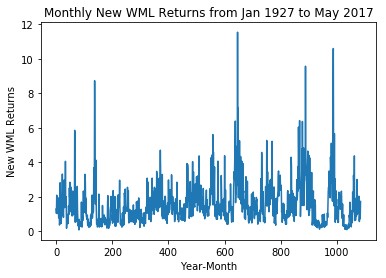

In [80]:
plt.plot(scaled_WML)
plt.xlabel('Year-Month')
plt.ylabel('New WML Returns')
plt.title('Monthly New WML Returns from Jan 1927 to May 2017');
plt.show()

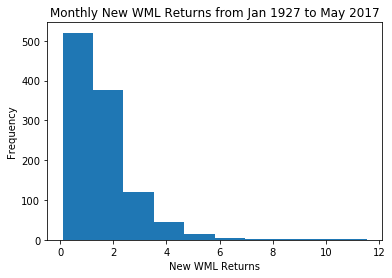

In [81]:
plt.hist(scaled_WML)
plt.xlabel('New WML Returns')
plt.ylabel('Frequency')
plt.title('Monthly New WML Returns from Jan 1927 to May 2017');
plt.show()

### Now, let's see if the kurtosis and skewness were actually lowered by the risk-managed momentum strategy:

In [84]:
print('Kurtosis: ' + str(scaled_WML.kurtosis()))
print('Skewness: '+ str(scaled_WML.skew()))

Kurtosis: 11.1143260604
Skewness: 2.46737572173


### Compared to the previously attained statistics of Kurtosis: 32.3861147105 and Skewness: 4.22810375746, these statistics (those of the risk-managed momentum) are clearly lower, which, as the paper discusses, is the goal. 